# 1.1 Plotting the Potential Field

## i

![IMG](1i.png)

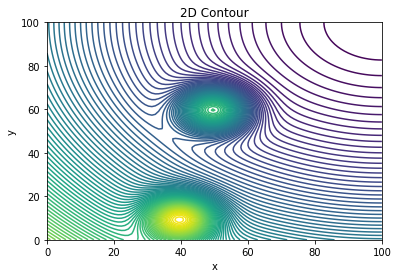

In [507]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
np.warnings.filterwarnings(
    'ignore', category=np.VisibleDeprecationWarning  # remove warnings
)

initial_loc = np.array([0, 0])
final_loc = np.array([100, 100])
sigma = np.array([[50, 0], [0, 50]])
mu = np.array([[60, 50], [10, 40]])


def f(x, y):
    return ((final_loc[0]-x)**2 + (final_loc[1]-y)**2)/20000 + 10000*(1/(2*np.pi*np.linalg.det(sigma)))*np.exp(-.5*(np.matmul(np.array([x-mu[0, 0], y-mu[0, 1]]), np.matmul(np.linalg.pinv(sigma), np.atleast_2d(np.array([x-mu[0, 0], y-mu[0, 1]])).T)))[0]) + 10000*(1/(2*np.pi*np.linalg.det(sigma)))*np.exp(-.5*(np.matmul(np.array([x-mu[1, 0], y-mu[1, 1]]), np.matmul(np.linalg.pinv(sigma), np.array([x-mu[1, 0], y-mu[1, 1]])))))


x = np.linspace(0, 100, 100)
y = np.linspace(0, 100, 100)
z = f(x[:, None], y[None, :])

fig = plt.figure()
ax = plt.axes()
ax.contour(x, y, z, 100)
ax.set_xlabel('x')
dy, dx = np.gradient(z)
# ax.quiver(x,y,dx,dy)
ax.set_ylabel('y')
# ax.set_zlabel('z')
ax.set_title('2D Contour')
plt.show()

## ii

![IMG](1ii.png)

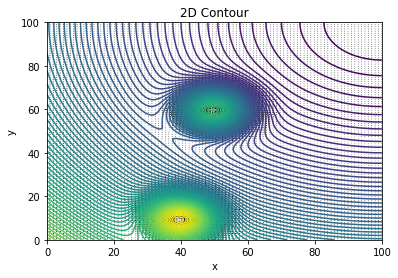

In [509]:
x = np.linspace(0, 100, 100)
y = np.linspace(0, 100, 100)
z = f(x[:, None], y[None, :])

fig = plt.figure()
ax = plt.axes()
ax.contour(x, y, z, 100)
ax.set_xlabel('x')
dy, dx = np.gradient(z)
ax.quiver(x,y,dx,dy)
ax.set_ylabel('y')
# ax.set_zlabel('z')
ax.set_title('2D Contour')
plt.show()

## iii

![img](1iii.png)


# 1.2 Gradient Descent

## i


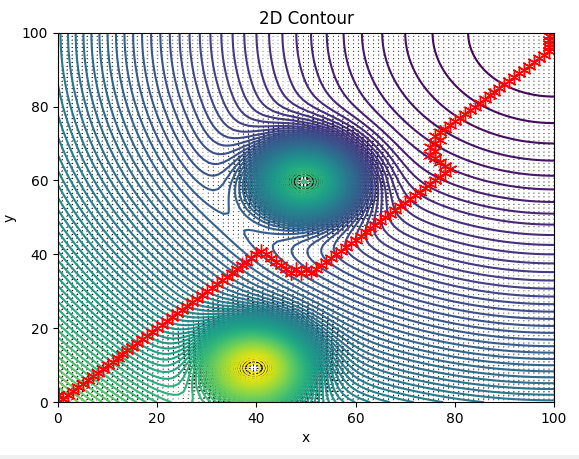

In [ ]:
def gradiantDescent(a,e,gx,gy,pos,ax):
    x,y = pos
    iters = 3000
    positions = []
    i = 0
    # while getDif(gx,gy,e,x,y):
    while i < iters:
        # print(i+1)
        i += 1
        # if gx[x][y] 
        # S = int(a*gx[x][y])
        # x,y = x - S, y - S
        
        # if len(positions) > 1000: positions.pop(0)
        ax.plot(-x,-y,2,marker=(6,2,0), color='red', ms=10)
        if abs(x) < 100 and abs(y) < 100:
            if abs(x) < 100: x = int(x+ np.sign(a*gx[x][y]))
            if abs(y) < 100: y = int(y + np.sign(a*gy[x][y]))
        # else: 
        #     print("hi")
        #     positions.append((x,y))
        #     break
        
        if (x,y) in positions: 
            x += 1
        positions.append((x,y))
        gy, gx = np.gradient(z)
        # norm= np.linalg.norm(np.array((dy, dx)), axis=0) 
        # gy = gy/ norm
        # gx = gx / norm
        if x == -100 and y == -100: break
    return positions

## ii
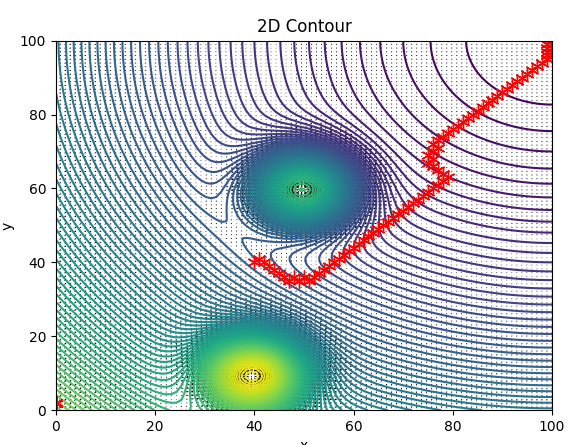

Position: 40, 40


## iii
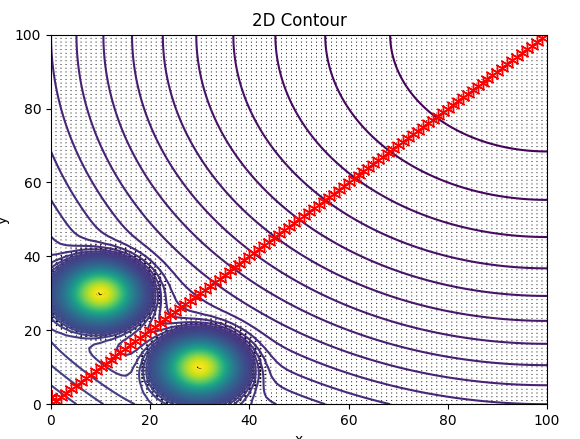

# 2 Swarms
@ 5 Bots: Number of iterations: 995

@ 10 Bots: Number of iterations: 500

@ 15 Bots: Number of iterations: 339

First, to get_unexplored_areas we must traverse  explore_map and if we encounter an unmapped we add it to unexplorered_list.

Next, in get_new_destination it looks through unexplored_areas and applies a heuristic function which looks for the minimum value and returns the position coorespoinding to unexplored_areas.

Then in update_explore_map we look for all unmapped regions in explore_map and then set them to planned including the destination. 

Finally, in update_position, we get the next position in route and delete this position from route so we do not repeat this move and get stuck in a loop. Then we set the explored region to mapped. If the current position equals the desination then we must make destination = [].

In [506]:
def get_unexplored_areas(explore_map, unmapped_value):
    unexplorered_list = []
    for i in range(50):
        for j in range(50):
            if explore_map[i][j] == unmapped_value or explore_map[i][j] == 0.:
                unexplorered_list.append([i,j])
    # print("get_unexplored_areas",unexplorered_list)
    return unexplorered_list
def get_new_destination(current_position, unexplored_areas):
    current_position
    goal = None
    m = float("inf")
    for pos in unexplored_areas:
        temp = m
        m = min(m, heuristic(current_position,pos))
        if m != temp:
            goal = pos
    return goal
def update_explore_map(dest, route, explore_map, planned, unmapped):
    for i,j in route:
        if explore_map[i][j] == unmapped: explore_map[i][j] = planned
    if explore_map[dest[0]][dest[1]] == unmapped and explore_map[dest[0]][dest[1]] != 1.0: explore_map[dest[0]][dest[1]] = planned
    return explore_map
def update_position(curPos, route, dest, explore_map, mapped):
    curPos = route[0] #1
    route = np.delete(route, (0), axis=0) #4
    explore_map[curPos[0]][curPos[1]] = mapped #2
    if curPos[0] == dest[0] and curPos[1] == dest[1]: dest = [] #3
    return curPos, route, dest, explore_map

# 3 Robot Kinematics

## 3.1 Forward Kinematics
![IMG](3i.png)

In [502]:
import numpy as np
import matplotlib.pyplot as plt
import math
def drawRobot(x_1, y_1, x_2, y_2, x_e, y_e):
    x_0, y_0 = 0, 0
    plt.plot([x_0, x_1, x_2, x_e], [y_0, y_1, y_2, y_e], lw=4.5)
    plt.scatter([x_0, x_1, x_2, x_e], [y_0, y_1, y_2, y_e], color='r')
    plt.show()

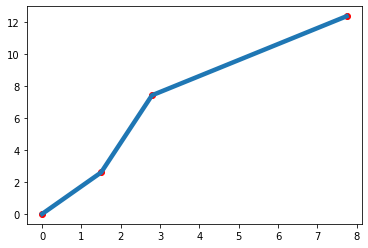

In [504]:
def forwardKinematics(theta0, theta1, theta2, l0, l1, l2):
    J1_x = l0*math.cos(theta0)
    J1_y = l0*math.sin(theta0)
    J2_x = l1*math.cos(theta0+theta1) + J1_x
    J2_y = l1*math.sin(theta0+theta1) + J1_y
    E_x = l2*math.cos(theta0+theta1+theta2)+J2_x
    E_y = l2*math.sin(theta0+theta1+theta2)+J2_y
    return J1_x,J1_y,J2_x,J2_y,E_x,E_y

a,b,c,d,e,f = forwardKinematics(math.pi/3,math.pi/12,-math.pi/6,3,5,7)
drawRobot(a,b,c,d,e,f)

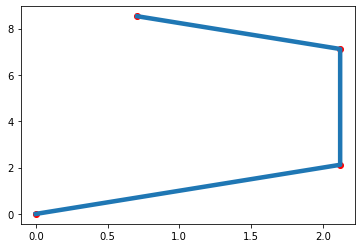

In [505]:
a,b,c,d,e,f = forwardKinematics(math.pi/4,math.pi/4,math.pi/4,3,5,2)
drawRobot(a,b,c,d,e,f)

## 3.2 Inverse Kinematics

#### Images of your robot for the solutions obtained with each of the two initializations
###### pi/6
![IMG](3ii_end6.png)
###### pi/3
![IMG](3ii_end3.png)
#### A plot showing the end effector positions through all the iterations.
###### pi/6
![IMG](3ii.png)
###### pi/3
![IMG](3ii_3.png)

End Angles: 154.3736977517296 -94.97620965424719 -64.26237995710592


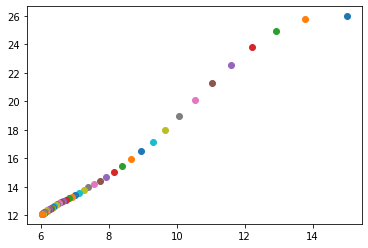

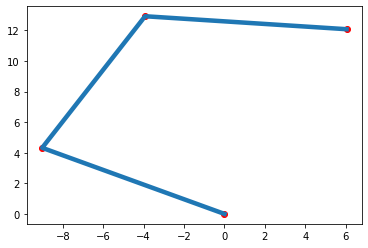

In [13]:
def inverseKinematics(l0, l1, l2, x_e_target, y_e_target):
    def make_jacobian(theta0,theta1,theta2,l0,l1,l2):
        jacobian = np.zeros((2,3))
        jacobian[0,0] = -l0*math.sin(theta0)-l1*math.sin(theta0+theta1)-l2*math.sin(theta0+theta1+theta2)
        jacobian[0,1] = -l1*math.sin(theta0+theta1) - l2*math.sin(theta0+theta1+theta2)
        jacobian[0,2] = -l2*math.sin(theta0+theta1+theta2)
        jacobian[1,0] = l0*math.cos(theta0)+l1*math.cos(theta0+theta1)+l2*math.cos(theta0+theta1+theta2)
        jacobian[1,1] = l1*math.cos(theta0+theta1)+l2*math.sin(theta0+theta1+theta2)
        jacobian[1,2] = l2*math.cos(theta0+theta1+theta2)
        return jacobian

    # Initialize for the plots:
    end_effector_positions = []

    # Initialize the thetas to some value
    theta0,theta1,theta2 = math.pi/3, 0,0
    # Obtain end effector position x_e, y_e for current thetas:
    # HINT: use your ForwardKinematics function
    a,b,c,d, x_e, y_e = forwardKinematics(theta0,theta1,theta2,l0,l1,l2)
    end_effector_positions.append([x_e,y_e])
    # Replace the '1' with a condition that checks if your estimated [x_e,y_e] is close to [x_e_target,y_e_target]
    while math.sqrt( (x_e_target-x_e)**2 + (y_e_target-y_e)**2 ) > 0.1:
        
        # Calculate the Jacobian matrix for current values of theta
        # HINT: write a function for doing this
        jacobian = make_jacobian(theta0,theta1,theta2,l0,l1,l2)
        # Calculate the pseudo-inverse of the jacobian (HINT: numpy pinv())
        inverse_jacobian = np.linalg.pinv(jacobian)
        # Update the values of the thetas by a small step
        gx = x_e_target-x_e
        gy = y_e_target-y_e
        
        a=np.array([[gx],[gy]])
        g_theta=0.1*np.matmul(inverse_jacobian,a)
        
        theta0 = theta0 + g_theta[0]
        theta1 = theta1 + g_theta[1]
        theta2 = theta2 + g_theta[2]
        # print(theta0,theta1,theta2)
        # Obtain end effector position x_e, y_e for the updated thetas:
        a,b,c,d,x_e,y_e = forwardKinematics(theta0,theta1,theta2,l0,l1,l2)
        # If you would like to visualize the iterations, draw the robot using drawRobot.

        # Save end effector positions for the plot:
        end_effector_positions.append([x_e,y_e])
        # Plot the final robot pose
        # Plot the end effector position through the iterations
    return end_effector_positions, theta0[0],theta1[0],theta2[0]


# Get graph of endpoints
myList, t1,t2,t3 = inverseKinematics(10,10,10,6,12)
for i in range(len(myList)):
    plt.scatter(myList[i][0],myList[i][1])
    # plt.pause(0.5)
print("End Angles:",t1 * 180 / math.pi,t2 * 180 / math.pi,t3 * 180 / math.pi)
plt.show()

# Get image of robot in final solution
a,b,c,d,e,f = forwardKinematics(t1,t2,t3,10,10,10)
drawRobot(a,b,c,d,e,f)


## 4 Maze Pathfinding

### 1. Depth First Search

### 2. Breadth First Search (BFS)


DFS does **4767** iterations while BFS does **2519**. BFS is faster in this graph. 

BFS and DFS are practically the same only one difference: BFS act as a line or queue where FIFO or First In First Out meaning all immidiate neighbors are explored before exploring the immidate neighbors neighbors. Where DFS instead acts as a stack of plates where to access the bottom plate you must first take off all the above plates from the top on down or LIFO Last In First Out. This means all neighbors are added to the stack, however the last neighbor added will be explored first and so will it's neighbors and so on.

In this algorythim we add paths to the stack/queue. We then pop the path off the stack and look at the first or last element of the popped path. From here we analyze it's neighbors and if they're inside the map and accessable and not looked at yet then we add those paths to the stack/queue and repeat until finding the endpoint OR the stack/queue is empty meaning no solution!

4767


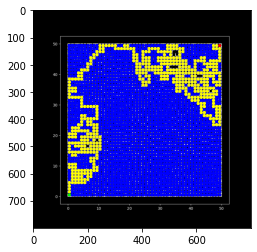

In [428]:
import matplotlib.pyplot as plt
import numpy as np
# im = pickle.read('172maze2021.p')
import pandas as pd

def notEdge(pos):
    if -1 in pos or 50 in pos: return False
    return True
def isSame(pos1,pos2):
    if pos1[0] is pos2[0] and pos1[1] is pos2[1]: return True
    return False

def dfs(start,end, im):
    i = 0
    path = []
    traversed  = []
    q = [[start]]
    while q:
        i += 1
        path = q.pop()
        start = path[-1]
        traversed.append(start)
        if isSame(start,end): return (path, traversed, i)
        
        theDirN = (start[0],start[1]+1)
        theDirE = (start[0]+1,start[1])
        theDirS = (start[0],start[1]-1)
        theDirW = (start[0]-1,start[1])
        
#         print(start)
        
        if notEdge(theDirN):
#             print("hi")
            if im[start][0]:
#                 print(theDirN,im[start][0])
                im[start][0]=False
                new_path = path.copy()
                new_path.append(theDirN)
                q.append(new_path)
                
        if im[start][1]:
            im[start][1]=False
            if notEdge(theDirE): 
                new_path = path.copy()
                new_path.append(theDirE)
                q.append(new_path)
                
        if im[start][2]:
            im[start][2]=False
            if notEdge(theDirS): 
                new_path = path.copy()
                new_path.append(theDirS)
                q.append(new_path)
                
        if im[start][3]:
            im[start][3]=False
            if notEdge(theDirW): 
                new_path = path.copy()
                new_path.append(theDirW)
                q.append(new_path)
                
                
def draw_path(final_path_points, other_path_points):
    '''
    final_path_points: the list of points (as tuples or lists) comprising your final maze path. 
    other_path_points: the list of points (as tuples or lists) comprising all other explored maze points. 
    (0,0) is the start, and (49,49) is the goal.
    Note: the maze template must be in the same folder as this script.
    '''
    im = plt.imread('172maze2021.png')
    x_interval = (686-133)/49
    y_interval = (671-122)/49
    plt.imshow(im)
    fig = plt.gcf()
    ax = fig.gca()
    circle_start = plt.Circle((133, 800-122), radius=4, color='lime')
    circle_end = plt.Circle((686, 800-671), radius=4, color='red')
    ax.add_patch(circle_start)
    ax.add_patch(circle_end)
    for point in other_path_points:
        if not (point[0] == 0 and point[1] == 0) and not (point[0] == 49 and point[1] == 49):
            circle_temp = plt.Circle(
                (133+point[0]*x_interval, 800-(122+point[1]*y_interval)), radius=4, color='blue')
            ax.add_patch(circle_temp)
    for point in final_path_points:
        if not (point[0] == 0 and point[1] == 0) and not (point[0] == 49 and point[1] == 49):
            circle_temp = plt.Circle(
                (133+point[0]*x_interval, 800-(122+point[1]*y_interval)), radius=4, color='yellow')
            ax.add_patch(circle_temp)
    plt.show()
    
    
pic = pd.read_pickle('172maze2021.p')
thing = dfs((0,0),(49,49),pic)
print(thing[2])
draw_path(thing[0],thing[1])

![IMG](4dfs.png)

2519


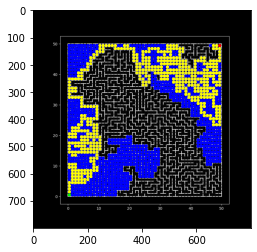

In [427]:
def bfs(start,end, im):
    path = []
    traversed  = []
    q = [[start]]
    i = 0
    while q:
        i += 1
        path = q.pop(0)
        start = path[-1]
        traversed.append(start)
        if isSame(start,end): return (path, traversed, i)
        
        theDirN = (start[0],start[1]+1)
        theDirE = (start[0]+1,start[1])
        theDirS = (start[0],start[1]-1)
        theDirW = (start[0]-1,start[1])
        
#         print(start)
        
        if notEdge(theDirN):
#             print("hi")
            if im[start][0]:
#                 print(theDirN,im[start][0])
                im[start][0]=False
                new_path = path.copy()
                new_path.append(theDirN)
                q.append(new_path)
                
        if im[start][1]:
            im[start][1]=False
            if notEdge(theDirE): 
                new_path = path.copy()
                new_path.append(theDirE)
                q.append(new_path)
                
        if im[start][2]:
            im[start][2]=False
            if notEdge(theDirS): 
                new_path = path.copy()
                new_path.append(theDirS)
                q.append(new_path)
                
        if im[start][3]:
            im[start][3]=False
            if notEdge(theDirW): 
                new_path = path.copy()
                new_path.append(theDirW)
                q.append(new_path)
                
                
def draw_path(final_path_points, other_path_points):
    '''
    final_path_points: the list of points (as tuples or lists) comprising your final maze path. 
    other_path_points: the list of points (as tuples or lists) comprising all other explored maze points. 
    (0,0) is the start, and (49,49) is the goal.
    Note: the maze template must be in the same folder as this script.
    '''
    im = plt.imread('172maze2021.png')
    x_interval = (686-133)/49
    y_interval = (671-122)/49
    plt.imshow(im)
    fig = plt.gcf()
    ax = fig.gca()
    circle_start = plt.Circle((133, 800-122), radius=4, color='lime')
    circle_end = plt.Circle((686, 800-671), radius=4, color='red')
    ax.add_patch(circle_start)
    ax.add_patch(circle_end)
    for point in other_path_points:
        if not (point[0] == 0 and point[1] == 0) and not (point[0] == 49 and point[1] == 49):
            circle_temp = plt.Circle(
                (133+point[0]*x_interval, 800-(122+point[1]*y_interval)), radius=4, color='blue')
            ax.add_patch(circle_temp)
    for point in final_path_points:
        if not (point[0] == 0 and point[1] == 0) and not (point[0] == 49 and point[1] == 49):
            circle_temp = plt.Circle(
                (133+point[0]*x_interval, 800-(122+point[1]*y_interval)), radius=4, color='yellow')
            ax.add_patch(circle_temp)
    plt.show()
    
    
pic = pd.read_pickle('172maze2021.p')
thing = bfs((0,0),(49,49),pic)
print(thing[2])
draw_path(thing[0],thing[1])

![IMG](4bfs.png)